In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('always')

In [2]:
df = pd.read_csv('../../Dataset/kendaraan_train_clean.csv')
df.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
126753,0.957913,-0.147222,0.044705,0.748977,1.070422,0.755505,1.051748,-0.295564,0.223363,-1.068743,0
136833,-1.099543,-1.073952,0.044705,-1.611120,1.070422,-1.049090,-1.000477,-0.688596,0.757866,-1.044248,0
29498,0.957913,-0.014832,0.044705,-1.925800,-0.982998,0.755505,1.051748,-1.205966,-1.647398,0.351945,0
52576,0.957913,0.117558,0.044705,-1.453781,-0.982998,0.755505,1.051748,-0.052860,0.796045,-0.542108,0
9626,-1.099543,1.176678,0.044705,-1.217771,1.070422,0.755505,-1.000477,0.296503,-1.647398,0.498913,0


In [3]:
df_test = pd.read_csv('../../Dataset/kendaraan_test_clean.csv')
df_test.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
24707,0.957913,-0.081027,0.044705,1.535676,-0.982998,0.755505,-1.000477,-1.139466,-1.933739,0.829590,0
3108,0.957913,0.845703,0.044705,1.693016,-0.982998,0.755505,1.051748,-3.726433,-1.647398,-0.640087,0
9160,0.957913,1.309068,0.044705,0.119618,-0.982998,2.560099,1.051748,0.539558,-1.647398,1.258246,0
19023,-1.099543,0.647118,0.044705,0.198288,1.070422,0.755505,-1.000477,0.137159,0.223363,0.903074,0
10324,-1.099543,-0.345807,0.044705,0.276958,1.070422,-1.049090,-1.000477,-0.923105,0.757866,0.560150,0


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

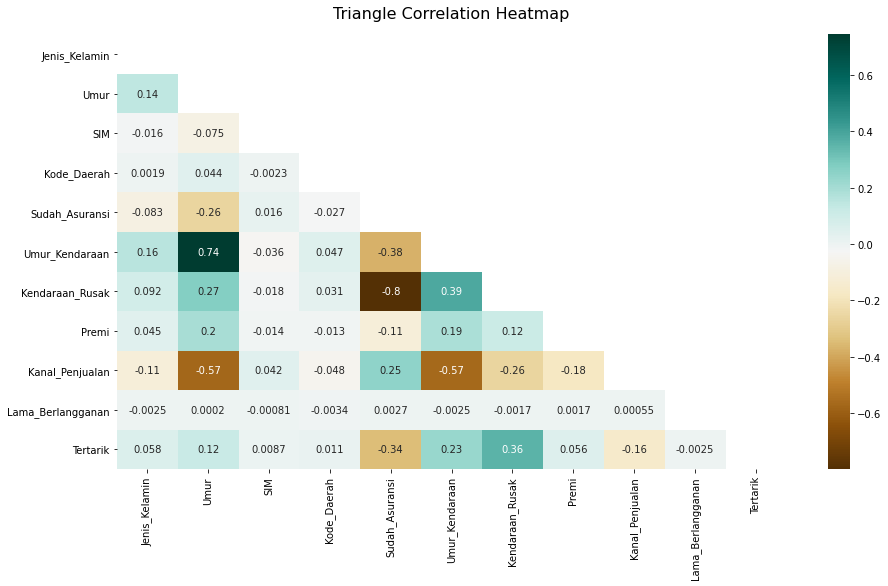

In [4]:
plt.figure(figsize=(15, 8))

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 16}, pad=16)

0    202945
1     27686
Name: Tertarik, dtype: int64


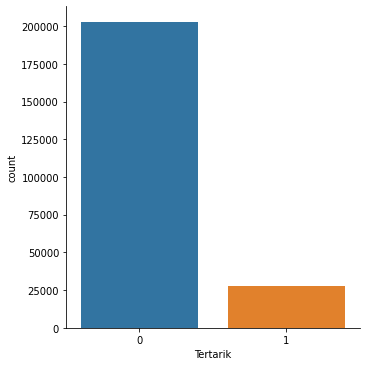

In [5]:
print(df['Tertarik'].value_counts())
sns.catplot(x='Tertarik', data=df, kind='count')

In [6]:
x_data = df.drop("Tertarik", axis=1)
y_data = df["Tertarik"]

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print('---------------------------------')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


x_train shape: (184504, 10)
x_test shape: (46127, 10)
---------------------------------
y_train shape: (184504,)
y_test shape: (46127,)


## **Tuning Model**

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


In [9]:
classifier = [
    DecisionTreeClassifier(random_state=42, splitter="random"),
    LogisticRegression(max_iter=2000),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    RandomForestClassifier(class_weight='balanced'),
]

name = [
    'Decision Tree',
    'Logistic Regression',
    'Gradient Boosting', 
    'AdaBoost',
    'Random Forest',
]


In [10]:
def accuracy(model, name):
    print(f"Akurasi model {name}: {round(model.score(x_test, y_test) * 100, 2)}")


In [11]:
for models, i in zip(classifier, name):
    models.fit(x_train, y_train)
    accuracy(models, i)


Akurasi model Decision Tree: 82.58
Akurasi model Logistic Regression: 88.05
Akurasi model Gradient Boosting: 88.07
Akurasi model AdaBoost: 88.06
Akurasi model Random Forest: 87.22


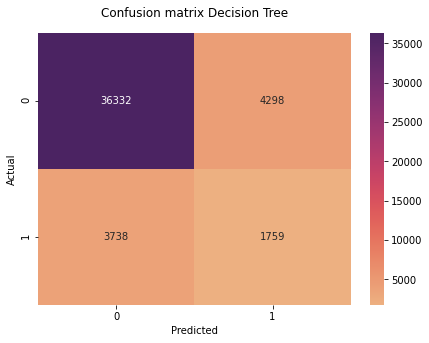


               precision    recall  f1-score   support

           0       0.91      0.89      0.90     40630
           1       0.29      0.32      0.30      5497

    accuracy                           0.83     46127
   macro avg       0.60      0.61      0.60     46127
weighted avg       0.83      0.83      0.83     46127




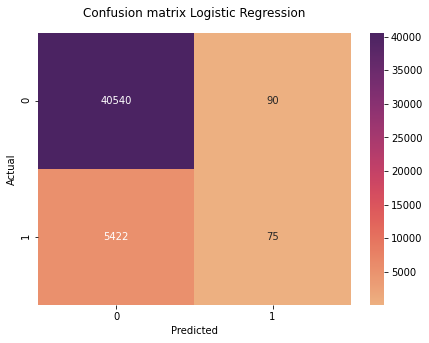


               precision    recall  f1-score   support

           0       0.88      1.00      0.94     40630
           1       0.45      0.01      0.03      5497

    accuracy                           0.88     46127
   macro avg       0.67      0.51      0.48     46127
weighted avg       0.83      0.88      0.83     46127




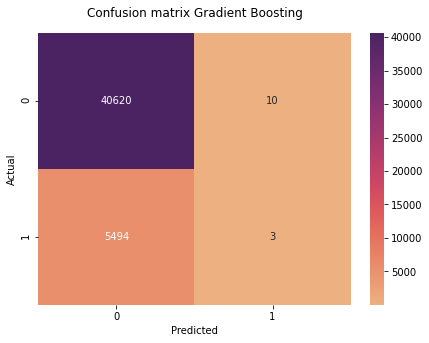


               precision    recall  f1-score   support

           0       0.88      1.00      0.94     40630
           1       0.23      0.00      0.00      5497

    accuracy                           0.88     46127
   macro avg       0.56      0.50      0.47     46127
weighted avg       0.80      0.88      0.83     46127




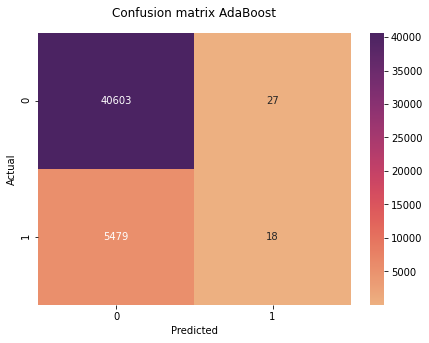


               precision    recall  f1-score   support

           0       0.88      1.00      0.94     40630
           1       0.40      0.00      0.01      5497

    accuracy                           0.88     46127
   macro avg       0.64      0.50      0.47     46127
weighted avg       0.82      0.88      0.83     46127




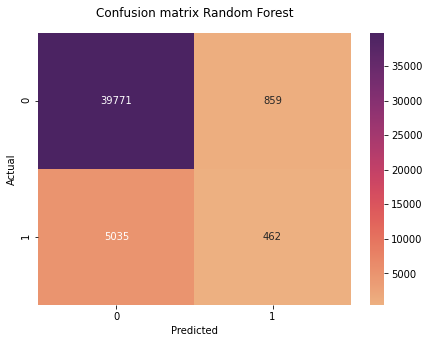


               precision    recall  f1-score   support

           0       0.89      0.98      0.93     40630
           1       0.35      0.08      0.14      5497

    accuracy                           0.87     46127
   macro avg       0.62      0.53      0.53     46127
weighted avg       0.82      0.87      0.84     46127




In [12]:
from sklearn.metrics import confusion_matrix, classification_report

def report(model, title):
    result = model.predict(x_test)

    conf_matrix = confusion_matrix(y_test, result)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')
    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion matrix {title}', pad=16)
    plt.show()

    print("\n", classification_report(y_test, result), end="\n\n")


for models, i in zip(classifier, name):
    report(models, i)

## **Validation Test**

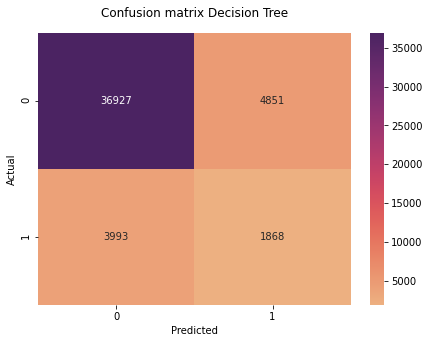


               precision    recall  f1-score   support

           0       0.90      0.88      0.89     41778
           1       0.28      0.32      0.30      5861

    accuracy                           0.81     47639
   macro avg       0.59      0.60      0.60     47639
weighted avg       0.83      0.81      0.82     47639




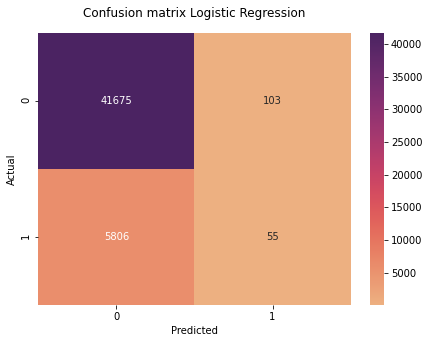


               precision    recall  f1-score   support

           0       0.88      1.00      0.93     41778
           1       0.35      0.01      0.02      5861

    accuracy                           0.88     47639
   macro avg       0.61      0.50      0.48     47639
weighted avg       0.81      0.88      0.82     47639




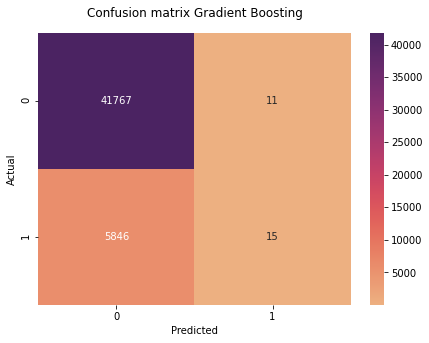


               precision    recall  f1-score   support

           0       0.88      1.00      0.93     41778
           1       0.58      0.00      0.01      5861

    accuracy                           0.88     47639
   macro avg       0.73      0.50      0.47     47639
weighted avg       0.84      0.88      0.82     47639




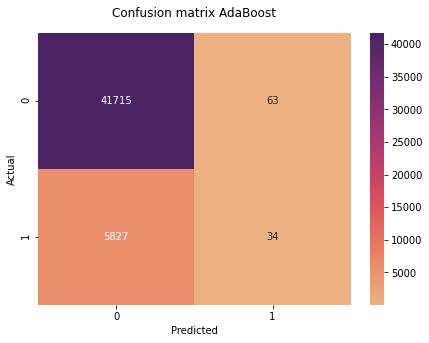


               precision    recall  f1-score   support

           0       0.88      1.00      0.93     41778
           1       0.35      0.01      0.01      5861

    accuracy                           0.88     47639
   macro avg       0.61      0.50      0.47     47639
weighted avg       0.81      0.88      0.82     47639




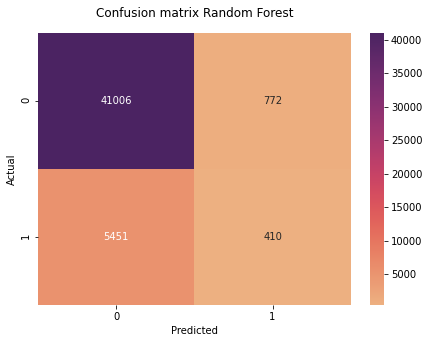


               precision    recall  f1-score   support

           0       0.88      0.98      0.93     41778
           1       0.35      0.07      0.12      5861

    accuracy                           0.87     47639
   macro avg       0.61      0.53      0.52     47639
weighted avg       0.82      0.87      0.83     47639




In [13]:
x_test = df_test.drop("Tertarik", axis=1)
y_test = df_test["Tertarik"]

def report(model, title):
    result = model.predict(x_test)

    conf_matrix = confusion_matrix(y_test, result)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion matrix {title}', pad=16)
    plt.show()

    print("\n", classification_report(y_test, result), end="\n\n")


for models, i in zip(classifier, name):
    report(models, i)
